
 Evaluando: N x^1 e^(-0.01x)
Intervalos evaluados: [(0.0, 1), (0.0, 0.5), (0.5, 1), (0.5, 0.75), (0.75, 1), (0.75, 0.875), (0.875, 1), (0.875, 0.9375), (0.9375, 1), (0.9375, 0.96875), (0.96875, 1), (0.96875, 0.984375), (0.984375, 1), (0.96875, 0.9765625), (0.9765625, 0.984375), (0.984375, 0.9921875), (0.9921875, 1), (0.9921875, 0.99609375), (0.99609375, 1), (0.9921875, 0.994140625), (0.994140625, 0.99609375), (0.99609375, 0.998046875), (0.998046875, 1), (0.998046875, 0.9990234375), (0.9990234375, 1), (0.9990234375, 0.99951171875), (0.99951171875, 1), (0.99951171875, 0.999755859375), (0.999755859375, 1)]
Número de intervalos: 29
Número de iteraciones: 29
Adaptativo (propio) : 1.000000000000001 ------ |1 - 1.000000000000001| = 0.000000000000001 ----- [⏱ 0.000673 s]
quad                : 1.000000000000000 ------ |1 - 1.000000000000000| = 0.000000000000000 ----- [⏱ 0.000252 s]
trapz (0-100)       : 0.999500517388558 ------ |1 - 0.999500517388558| = 0.000499482611442 ----- [⏱ 0.000090 s]
t

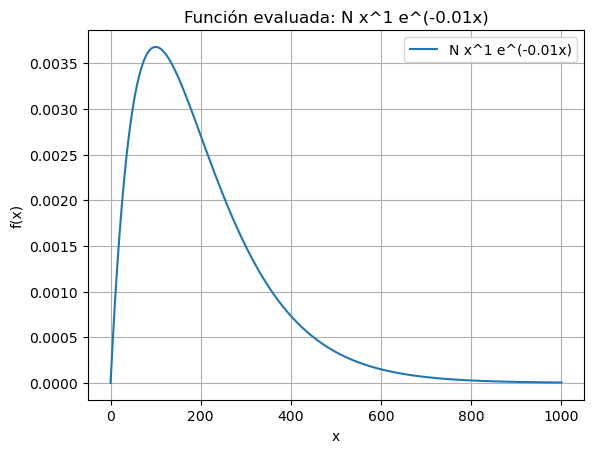

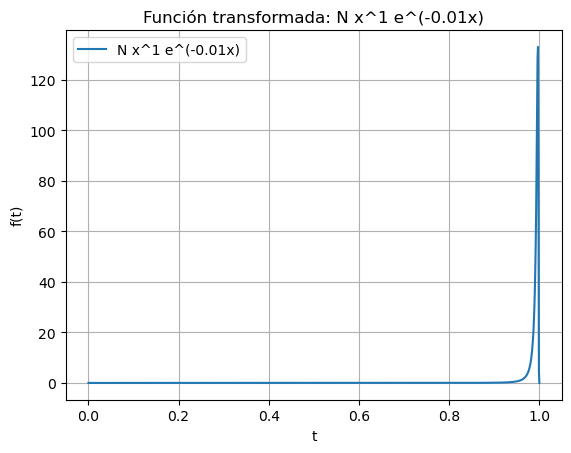

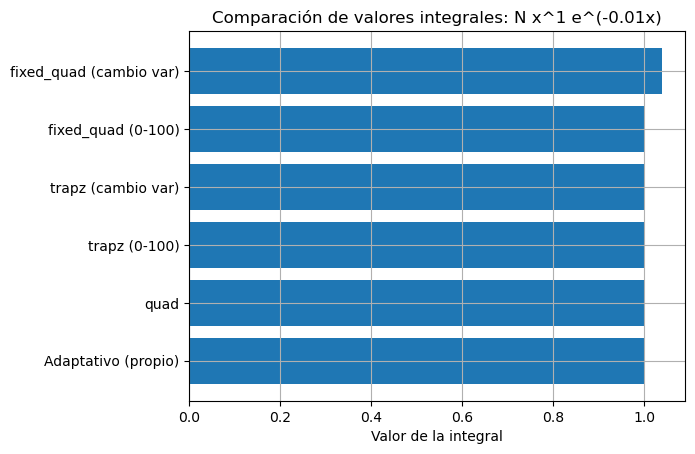

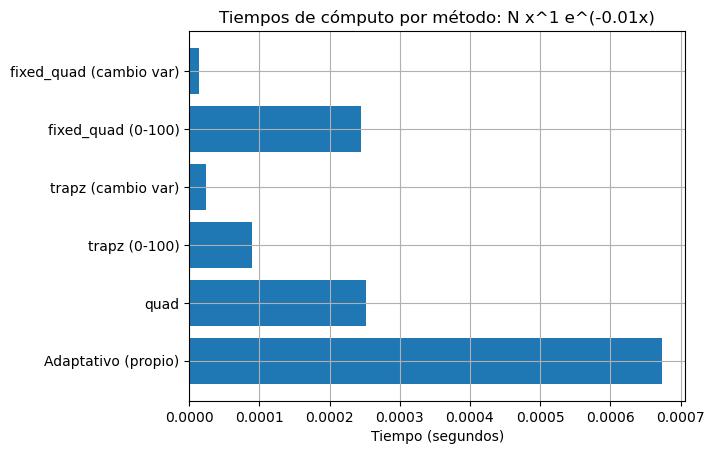


 Evaluando: (1.1 - 1) / (1 + x)^1.1
Intervalos evaluados: [(0.0, 1), (0.0, 0.5), (0.5, 1), (0.5, 0.75), (0.75, 1), (0.75, 0.875), (0.875, 1), (0.875, 0.9375), (0.9375, 1), (0.9375, 0.96875), (0.96875, 1), (0.96875, 0.984375), (0.984375, 1), (0.984375, 0.9921875), (0.9921875, 1), (0.9921875, 0.99609375), (0.99609375, 1), (0.99609375, 0.998046875), (0.998046875, 1), (0.998046875, 0.9990234375), (0.9990234375, 1), (0.9990234375, 0.99951171875), (0.99951171875, 1), (0.99951171875, 0.999755859375), (0.999755859375, 1), (0.999755859375, 0.9998779296875), (0.9998779296875, 1), (0.9998779296875, 0.99993896484375), (0.99993896484375, 1), (0.9998779296875, 0.999908447265625), (0.999908447265625, 0.99993896484375), (0.99993896484375, 0.999969482421875), (0.999969482421875, 1), (0.99993896484375, 0.9999542236328125), (0.9999542236328125, 0.999969482421875), (0.9999542236328125, 0.9999618530273438), (0.9999618530273438, 0.999969482421875), (0.999969482421875, 0.9999847412109375), (0.99998474121093

C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_13140\3123228308.py:117: UserWarning: Too many iterations, adding last evaluated interval.
  warnings.warn("Too many iterations, adding last evaluated interval.")


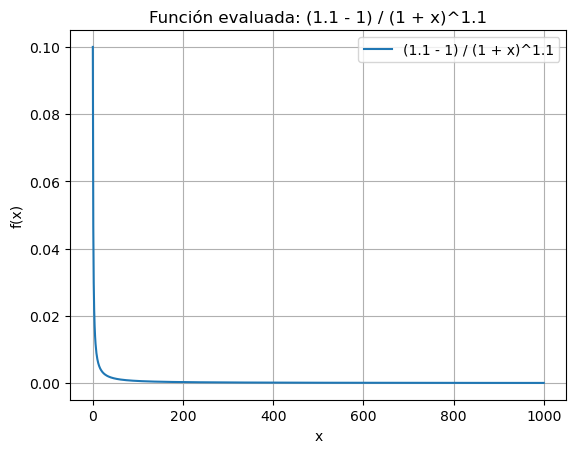

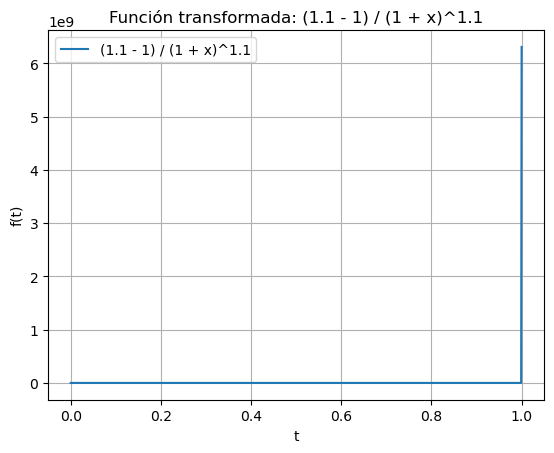

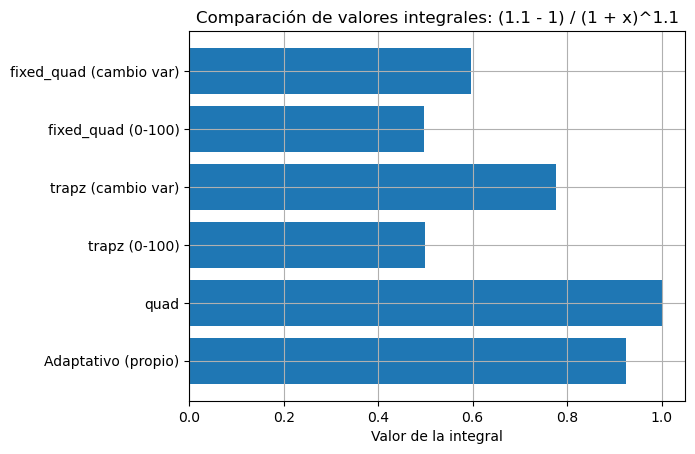

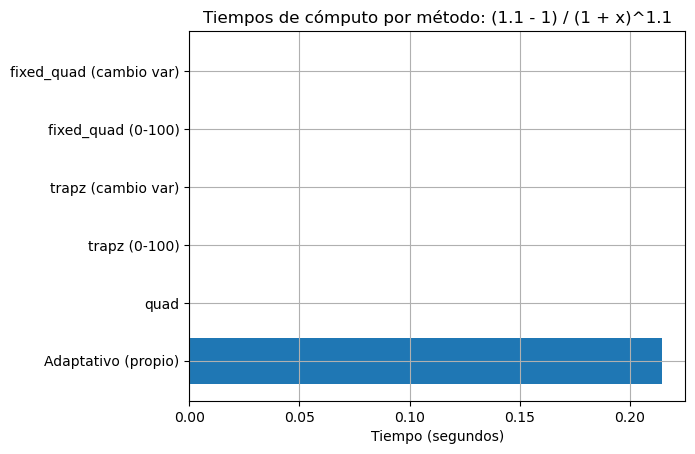

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.special as sp
from scipy.integrate import quad

# Valores para cuadratura de Gauss-Kronrod 10-21 puntos (G10-K21) oficiales
xgauss = np.array([
    -9.739065285171717200779640120844521e-01,
    -8.650633666889845107320966884234930e-01,
    -6.794095682990244062343273651148736e-01,
    -4.333953941292471907992659431657842e-01,
    -1.488743389816312108848260011297200e-01,
     1.488743389816312108848260011297200e-01,
     4.333953941292471907992659431657842e-01,
     6.794095682990244062343273651148736e-01,
     8.650633666889845107320966884234930e-01,
     9.739065285171717200779640120844521e-01
])

wgauss = np.array([
    6.667134430868813759356880989333179e-02,
    1.494513491505805931457763396576973e-01,
    2.190863625159820439955349342281632e-01,
    2.692667193099963550912269215694694e-01,
    2.955242247147528701738929946513383e-01,
    2.955242247147528701738929946513383e-01,
    2.692667193099963550912269215694694e-01,
    2.190863625159820439955349342281632e-01,
    1.494513491505805931457763396576973e-01,
    6.667134430868813759356880989333179e-02
])

xkronrod = np.array([
    -9.956571630258080807355272806890028e-01,
    -9.739065285171717200779640120844521e-01,
    -9.301574913557082260012071800595083e-01,
    -8.650633666889845107320966884234930e-01,
    -7.808177265864168970637175783450424e-01,
    -6.794095682990244062343273651148736e-01,
    -5.627571346686046833390000992726941e-01,
    -4.333953941292471907992659431657842e-01,
    -2.943928627014601981311266031038656e-01,
    -1.488743389816312108848260011297200e-01,
     0.000000000000000000000000000000000e+00,
     1.488743389816312108848260011297200e-01,
     2.943928627014601981311266031038656e-01,
     4.333953941292471907992659431657842e-01,
     5.627571346686046833390000992726941e-01,
     6.794095682990244062343273651148736e-01,
     7.808177265864168970637175783450424e-01,
     8.650633666889845107320966884234930e-01,
     9.301574913557082260012071800595083e-01,
     9.739065285171717200779640120844521e-01,
     9.956571630258080807355272806890028e-01
])

wkronrod = np.array([
    1.169463886737187427806439606219205e-02,
    3.255816230796472747881897245938976e-02,
    5.475589657435199603138130024458018e-02,
    7.503967481091995276704314091619001e-02,
    9.312545458369760553506546508336634e-02,
    1.093871588022976418992105903258050e-01,
    1.234919762620658510779581098310742e-01,
    1.347092173114733259280540017717068e-01,
    1.427759385770600807970942731387171e-01,
    1.477391049013384913748415159720680e-01,
    1.494455540029169056649364683898212e-01,
    1.477391049013384913748415159720680e-01,
    1.427759385770600807970942731387171e-01,
    1.347092173114733259280540017717068e-01,
    1.234919762620658510779581098310742e-01,
    1.093871588022976418992105903258050e-01,
    9.312545458369760553506546508336634e-02,
    7.503967481091995276704314091619001e-02,
    5.475589657435199603138130024458018e-02,
    3.255816230796472747881897245938976e-02,
    1.169463886737187427806439606219205e-02
])

def gauss_kronrod(f, a, b):
    mid = 0.5 * (a + b)
    half_length = 0.5 * (b - a)

    nodes = mid + half_length * xkronrod
    f_nodes = f(nodes)
    integral = half_length * np.sum(wkronrod * f_nodes)

    nodes_gauss = mid + half_length * xgauss
    f_nodes_gauss = f(nodes_gauss)
    integral_gauss = half_length * np.sum(wgauss * f_nodes_gauss)

    error_estimate = np.abs(integral - integral_gauss)

    return integral, error_estimate

def adaptive_integrate(f, a, b, epsabs=1e-15, epsrel=1e-15, limit=10000, record_intervals=True):
    if np.isinf(a) or np.isinf(b):
        if np.isinf(a) and not np.isinf(b):
            g = lambda t: f(t/(1-t)) * (1 / (1-t)**2)
            return adaptive_integrate(g, 0.0, 1 , epsabs, epsrel, limit)
        elif not np.isinf(a) and np.isinf(b):
            g = lambda t: f(t/(1-t)) * (1 / (1-t)**2)
            return adaptive_integrate(g, 0.0, 1 , epsabs, epsrel, limit)
        else:
            raise ValueError("Cannot integrate from -inf to +inf with this mapping.")

    stack = [(a, b)]
    total = 0.0
    iterations = 0
    
    intervals = [(a, b)]  # Para almacenar los intervalos evaluados
    while stack:
        iterations += 1
        if iterations > limit:
            warnings.warn("Too many iterations, adding last evaluated interval.")
            a1, b1 = stack.pop()
            integral, _ = gauss_kronrod(f, a1, b1)
            total += integral
            break

        a1, b1 = stack.pop()
        if a1 == b1:
            continue

        integral, error = gauss_kronrod(f, a1, b1)
        tolerance = max(epsabs, epsrel * np.abs(integral))

        if np.isnan(error) or np.isnan(integral):
            continue

        if error < tolerance:
            total += integral
        else:
            mid = 0.5 * (a1 + b1)
            stack.append((mid, b1))
            stack.append((a1, mid))
            if record_intervals:
                intervals.append((a1, mid))
                intervals.append((mid, b1))

    if record_intervals:
        print("Intervalos evaluados:", intervals)
        print("Número de intervalos:", len(intervals))
        print("Número de iteraciones:", iterations)
        return total, intervals
    else:
        return total

# Ejemplo de uso:
if __name__ == "__main__":
    import numpy as np
import scipy.integrate as spi
import scipy.special as sps
import matplotlib.pyplot as plt
import time

# Tu implementación de adaptive_integrate y gauss_kronrod debe estar arriba

### Función tipo exponencial-potencia ###
def exp_potencial_func(a, b):
    N = (b**(a + 1)) / sps.gamma(a + 1)
    return lambda x: N * x**a * np.exp(-b * x)

### Función tipo potencia ###
def slow_decay_func(p):
    return lambda x: (p-1) / (1 + x)**p

### Evaluación y visualización ###
def evaluate_methods(f, a=0, b=np.inf, name="f(x)", plot_range=(0, 20), method_label=None):
    print(f"\n Evaluando: {name}")
    results = {}

    # Método adaptativo propio
    start = time.perf_counter()
    adapt_val, _ = adaptive_integrate(f, a, b)
    elapsed = time.perf_counter() - start
    error = np.abs(adapt_val - 1)  # Error ficticio para mostrar
    results["Adaptativo (propio)"] = (adapt_val, elapsed, error)

    # scipy.quad
    start = time.perf_counter()
    quad_val, quad_err = spi.quad(f, a, b, epsabs=1e-10, epsrel=1e-10)
    elapsed = time.perf_counter() - start
    error = np.abs(quad_val - 1)  # Error ficticio para mostrar
    results["quad"] = (quad_val, elapsed, error)


    # Trapz
    x = np.linspace(0, plot_range[1], 10000)
    y = f(x)
    start = time.perf_counter()
    trapz_val = np.trapz(y, x)
    elapsed = time.perf_counter() - start
    error = np.abs(trapz_val - 1)  # Error ficticio para mostrar
    results["trapz (0-100)"] = (trapz_val, elapsed, error)

    #Trapz con cambio de variable
    t = np.linspace(0, 0.99999, 10000)
    y2 = f(t / (1 - t)) / (1 - t)**2
    start = time.perf_counter()
    trapz_val_cv = np.trapz(y2, t)
    elapsed = time.perf_counter() - start
    error = np.abs(trapz_val_cv - 1)  # Error ficticio para mostrar
    results["trapz (cambio var)"] = (trapz_val_cv, elapsed, error)

    # fixed_quad
    start = time.perf_counter()
    fixed_val, _ = spi.fixed_quad(f, 0, plot_range[1], n=50)
    elapsed = time.perf_counter() - start
    error = np.abs(fixed_val - 1)  # Error ficticio para mostrar
    results["fixed_quad (0-100)"] = (fixed_val, elapsed, error)

    # Fixed_quad con cambio de variable
    g = lambda t: f(t / (1 - t)) / (1 - t)**2
    start = time.perf_counter()
    quad_trans_val, _ = spi.fixed_quad(g, 0, 1 - 1e-12, n=50)
    elapsed = time.perf_counter() - start
    error = np.abs(quad_trans_val - 1)  # Error ficticio para mostrar
    results["fixed_quad (cambio var)"] = (quad_trans_val, elapsed, error)


    # Resultados
    for k, (val, t, e) in results.items():
        print(f"{k:<20s}: {val:.15f} ------ |1 - {val:.15f}| = {e:.15f} ----- [⏱ {t:.6f} s]")

    ### Gráfica de la función ###
    x_plot = np.linspace(*plot_range, 1000)
    y_plot = f(x_plot)
    plt.figure()
    plt.plot(x_plot, y_plot, label=name)
    plt.title(f"Función evaluada: {name}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

    ### Gráfica de la función transformada ###
    t_plot = np.linspace(0, 1 - 1e-12, 1000)
    y_plot_cv = f(t_plot / (1 - t_plot)) / (1 - t_plot)**2
    plt.figure()
    plt.plot(t_plot, y_plot_cv, label=name)
    plt.title(f"Función transformada: {name}")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.grid(True)
    plt.legend()
    plt.show()

    ### Comparación de valores ###
    plt.figure()
    methods = list(results.keys())
    values = [results[m][0] for m in methods]
    times = [results[m][1] for m in methods]

    plt.barh(methods, values)
    plt.title(f"Comparación de valores integrales: {name}")
    plt.xlabel("Valor de la integral")
    plt.grid(True)
    plt.show()

    ### Comparación de tiempos ###
    plt.figure()
    plt.barh(methods, times)
    plt.title(f"Tiempos de cómputo por método: {name}")
    plt.xlabel("Tiempo (segundos)")
    plt.grid(True)
    plt.show()

### Estudio ###
# Caso 1: f(x) = N x^a e^{-bx}
a1, b1 = 1, 0.01
f1 = exp_potencial_func(a1, b1)
evaluate_methods(f1, name=f"N x^{a1} e^(-{b1}x)", plot_range=(0, 1000))

# Caso 2: f(x) = (p-1) / (1 + x)^p
p2 = 1.1
f2 = slow_decay_func(p2)
evaluate_methods(f2, name=f"({p2} - 1) / (1 + x)^{p2}", plot_range=(0, 1000))
